<a href="https://colab.research.google.com/github/hongrolee/Machine-Learning/blob/main/%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89%EC%97%90%EC%84%9C%EC%9D%98_%EC%82%AC%EB%9E%8C_%EB%B6%84%EB%A5%982_%ED%9B%88%EB%A0%A8%2C%ED%85%8C%EC%8A%A4%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나의 첫 머신러닝 프로그래밍

## 자율주행에서의 사람 분류2

### 인식된 사람 데이터 현실적으로 수정하기

[21.16357325 21.60569582 22.30261411 22.93465623 23.14497119 23.2694893
 24.88623679 26.06906625 26.54072256 26.95362305 27.0962027  28.57376091
 29.58097055 29.65086969 30.24366712 30.31037775 30.72121828 30.90971805
 31.10617381 31.76587847 32.15221548 33.51480505 33.7855897  34.16083874
 34.55040675 34.76168155 35.3831215  36.50669747 36.74794587 36.91584056
 37.03713292 39.2116495  39.39764029 40.19495555 40.65955106 41.53945848
 42.15021185 42.28722712 45.76633325 46.19978817 46.30012882 47.65338267
 47.86043736 48.0470047  49.14158888 49.51309117 49.63776822 50.18273305
 51.37952361 51.72342259 52.2786293  54.99799376 55.79298935 56.7308605
 56.86230144 57.00277729 57.91693122 58.76183882 59.36930345 59.40944752
 59.87537591 60.27338167 60.93419537 61.11915913 62.56907882 62.60938132
 64.1525471  64.87503772 67.19341495 67.48739628 69.46038172 69.62476411
 69.76693602 70.23203116 70.67206835 71.26997958 73.40461908 74.32818553
 75.23158629 76.32638145 77.06796687 79.79767505 79.8

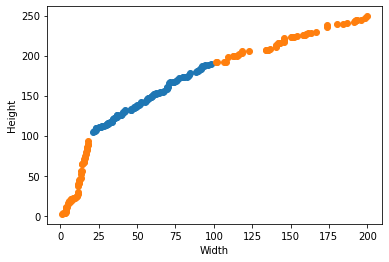

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

normal_person_width = np.sort(np.random.uniform(low=20, high=100, size=100))
normal_person_height = np.sort(np.random.uniform(low=100, high=190, size=100))

error_person_width = np.sort(np.append(np.random.uniform(low= 1, high=19, size=50),
                             np.random.uniform(low=101, high=200, size=50)))
error_person_height= np.sort(np.append(np.random.uniform(low=  1, high=99, size=50),
                             np.random.uniform(low=191, high=250, size=50)))
print(normal_person_width)

plt.scatter(normal_person_width, normal_person_height)
plt.scatter(error_person_width, error_person_height)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


### 학습을 위한 입력 데이터와 정답 준비하기

In [ ]:
width = np.append(normal_person_width, error_person_width)
height = np.append(normal_person_height, error_person_height)
answer = [1]*100 + [0]*100
person_data = [[l, w] for l, w in zip(width, height)]

person_data = np.array(person_data)
answer = np.array(answer)
print(person_data)

### (방법1) 데이터 인덱스 섞기

In [ ]:
np.random.seed(42)
index = np.arange(200)
np.random.shuffle(index)

In [ ]:
train_data = person_data[index[:150]]
train_answer = answer[index[:150]]

test_data = person_data[index[150:]]
test_answer = answer[index[150:]]

### 훈련 데이터와 테스트 데이터 함께 출력해 보기

In [ ]:
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

### (방법2) 사이킷런을 이용하여 훈련데이터 및 테스트데이터 생성하기

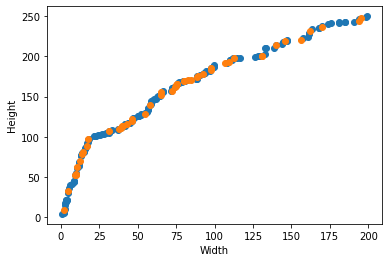

In [ ]:
from sklearn.model_selection import train_test_split
train_data_s, test_data_s, train_answer_s, test_answer_s = train_test_split(person_data, answer, random_state=42)

plt.scatter(train_data_s[:,0], train_data_s[:,1])
plt.scatter(test_data_s[:,0], test_data_s[:,1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [ ]:
train_data_s.shape

(150, 2)

### k-최근접 이웃 알고리즘을 적용하여 학습하기(모델생성)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_data, train_answer)
kn.score(test_data, test_answer)

1.0

In [ ]:
kn.predict([[20, 180]])
print(kn._fit_X)
print(kn._y)

[[ 96.31428616 184.25392967]
 [ 32.93029713 111.43544614]
 [ 42.461789   130.41956412]
 [110.037381   205.593538  ]
 [ 12.57918793  58.19829896]
 [  6.74156135  35.62851835]
 [ 75.27501905 159.4177639 ]
 [139.53096619 222.62968561]
 [151.01998487 227.19149656]
 [ 60.21096745 144.24542876]
 [ 73.08014153 157.15842858]
 [175.48507841 238.82264652]
 [133.53778999 215.67633914]
 [ 83.58490428 166.4107225 ]
 [179.17219614 240.46139358]
 [162.20358827 230.63034038]
 [ 70.58446645 149.89186473]
 [108.20353763 194.3261543 ]
 [ 88.24075644 171.56675753]
 [ 74.20514895 158.49675377]
 [ 11.3585352   52.71470869]
 [ 33.94931432 112.60756137]
 [ 18.30143015  97.64865296]
 [ 94.9383991  180.10048076]
 [ 72.79872368 156.32739241]
 [ 71.61382323 153.17499345]
 [ 90.96691394 171.84656611]
 [ 73.77084379 157.36869113]
 [ 11.54396046  55.27771987]
 [ 14.23127879  62.68106654]
 [ 27.49398143 107.06107432]
 [ 34.92148083 115.2543472 ]
 [ 70.49109008 149.43039982]
 [ 79.71931241 163.32920734]
 [102.0729275 

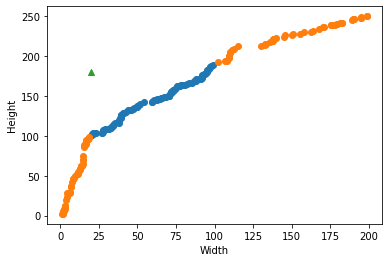

In [ ]:
plt.scatter(normal_person_width, normal_person_height)
plt.scatter(error_person_width, error_person_height)
plt.scatter(20, 180, marker='^')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_data, train_answer)
for n in range(1, 100):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산    
    score = kn.score(test_data, test_answer)
    print(str(n)+":"+str(score))


1:1.0
2:1.0
3:1.0
4:1.0
5:1.0
6:1.0
7:1.0
8:1.0
9:1.0
10:1.0
11:1.0
12:1.0
13:1.0
14:1.0
15:1.0
16:1.0
17:1.0
18:1.0
19:0.98
20:0.98
21:0.98
22:0.96
23:0.98
24:0.98
25:0.96
26:0.96
27:0.96
28:0.96
29:0.96
30:0.96
31:0.96
32:0.96
33:0.96
34:0.96
35:0.96
36:0.96
37:0.96
38:0.96
39:0.96
40:0.96
41:0.94
42:0.94
43:0.94
44:0.94
45:0.92
46:0.92
47:0.92
48:0.92
49:0.92
50:0.92
51:0.92
52:0.92
53:0.92
54:0.92
55:0.92
56:0.92
57:0.92
58:0.92
59:0.92
60:0.92
61:0.92
62:0.92
63:0.92
64:0.92
65:0.92
66:0.92
67:0.92
68:0.92
69:0.92
70:0.92
71:0.68
72:0.68
73:0.68
74:0.68
75:0.68
76:0.68
77:0.68
78:0.68
79:0.48
80:0.48
81:0.48
82:0.48
83:0.48
84:0.48
85:0.48
86:0.48
87:0.48
88:0.48
89:0.48
90:0.48
91:0.48
92:0.48
93:0.48
94:0.48
95:0.48
96:0.48
97:0.48
98:0.48
99:0.48
